# Data cleaning & merging
## Luis Natera
natera@hey.com

## Library imports

For the data cleanning and manipulation section I will use pandas and matplotlib for the visualizations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Please load the users and activity tables into Python.

a. How many variables are in the datasets?

b. How many observations are in the datasets?


In [2]:
df_activites = pd.read_csv('../data/raw/activities.csv')
df_users = pd.read_csv('../data/raw/users.csv')

In [3]:
for df, name in zip([df_activites,df_users],['activities','users']):
    print(f'The dataset {name} has {len(df)} observations, and there are {len(df.columns)} variables, such variables are: {df.columns.values}\
     and the types of data are:\n{df.dtypes}\n')

The dataset activities has 22642 observations, and there are 3 variables, such variables are: ['UserId' 'Date' 'Revenue']     and the types of data are:
UserId       int64
Date        object
Revenue    float64
dtype: object

The dataset users has 5807 observations, and there are 5 variables, such variables are: ['UserId' 'Country' 'DOB' 'Gender' 'RegDate']     and the types of data are:
UserId      int64
Country    object
DOB        object
Gender     object
RegDate    object
dtype: object



## 2. How many:
a. Male users are in the dataset?

b. Female users are in the dataset?

c. For how many users is no gender information available?


In [4]:
df_gender = pd.DataFrame(df_users.groupby('Gender').count().rename(columns={'UserId':'Users'})['Users'])
print(f"There are:\n    + {df_gender.at['M','Users']} Male users\n    + {df_gender.at['F','Users']} Female users\n    + {df_gender.at[' ','Users']} Users withouth gender information")

There are:
    + 2909 Male users
    + 1417 Female users
    + 1481 Users withouth gender information


If there is no gender information available, please assume that the gender is male (“M”) for all further questions.

In [5]:
#Replace the empty values to M
df_users['Gender'] = df_users['Gender'].replace(r'^\s*$', 'M', regex=True)

In [6]:
df = df_activites.merge(df_users, left_on='UserId',right_on='UserId',how='outer')

## Merge the two datasets and:

- Calculate the days since registration for each activity.
- What is the total mean and median revenue generated per user (ie across all activities)? 
- How do you interpret the result?

In [7]:
print(f"There are {len(df) - len(df.dropna(subset=['Date','Revenue']))} users without activities")
df = df.dropna(subset=['Date','Revenue'])

There are 10 users without activities


### Days since registration. 
To calculate them I substract the registration date from the activity date.

In [8]:
df.loc[:,'Date'] = pd.to_datetime(df['Date'])
df.loc[:,'RegDate'] = pd.to_datetime(df['RegDate'])
df.loc[:,'days_since_reg'] = df.Date - df.RegDate
df.head(5)

,UserId,Date,Revenue,Country,DOB,Gender,RegDate,days_since_reg
0,1326865,2017-02-19,17.05,DE,1988-05-04,M,2016-03-24,332 days
1,1326865,2017-02-28,17.05,DE,1988-05-04,M,2016-03-24,341 days
2,1326865,2017-03-06,17.16,DE,1988-05-04,M,2016-03-24,347 days
3,1326865,2017-03-07,17.16,DE,1988-05-04,M,2016-03-24,348 days
4,1326865,2017-03-08,17.16,DE,1988-05-04,M,2016-03-24,349 days


## Revenue by users
Calculate the total, mean, and median revenue of users

In [9]:
df_user_revenue = pd.DataFrame()
df_user_revenue['total'] =  df.groupby('UserId')['Revenue'].sum().round(2)
df_user_revenue['mean'] =  df.groupby('UserId')['Revenue'].mean().round(2)
df_user_revenue['median'] =  df.groupby('UserId')['Revenue'].median().round(2)
df_user_revenue.sort_values(['total','mean','median'],ascending=False, inplace=True)
df_user_revenue.head(20)

,total,mean,median
UserId,,,
3200511,104917.00,2622.92,1765.00
3191433,101460.33,1719.67,1287.22
3320312,82190.12,622.65,373.76
3238560,61920.00,4763.08,3000.00
3217184,57700.00,1202.08,500.00
3338504,52041.32,712.89,372.93
3174659,48874.59,3759.58,2450.00
3310071,34231.00,219.43,147.50
3319241,33506.00,138.45,90.00


## How do you interpret the result?

We can interpret the results to find users with revenue that has outliers. When comparing the mean with the median, if the distribution followed a normal distribution the mean and the median should be close to each other, however, in the data we can see that for certain users there is a difference between the mean and median values, meaning that they have some revenue that its affecting the distribution, outliers.

This will be shown when plotting the distribution of revenues by users.

In [10]:
total = df['Revenue'].sum().round(2)
mean = df['Revenue'].mean().round(2)
median = df['Revenue'].median().round(2)
print(f'When calculating the total, mean, and median of all the users (not only per user), we also observe\
that the distribution follow by all the revenue does not follow a normal distribution and that there will be outliers.\n\
The total revenue is: {total}, the mean revenue is {mean}, and the median of the revenue is {median}.')

When calculating the total, mean, and median of all the users (not only per user), we also observethat the distribution follow by all the revenue does not follow a normal distribution and that there will be outliers.
The total revenue is: 2972067.49, the mean revenue is 131.26, and the median of the revenue is 40.0.


## Visualise the distribution of the revenues by user

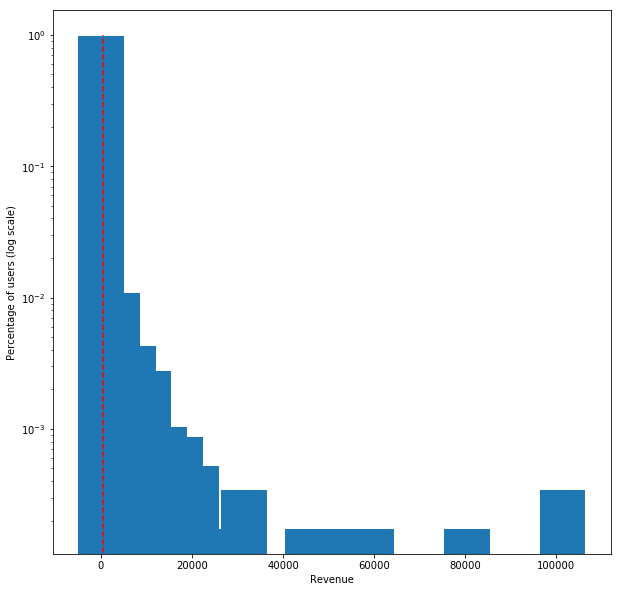

In [11]:
hist, bins = np.histogram(df_user_revenue['total'],bins=30)
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.bar(bins[:-1],hist/sum(hist),10000,)
ax.vlines(df_user_revenue['total'].mean(),0,1,color='red',linestyles='--')
ax.set_yscale('log')
ax.set_xlabel('Revenue')
ax.set_ylabel('Percentage of users (log scale)');

The revenue has a long tail distribution, where most of the users have a low revenue, while a couple of users have a high revenue. The red line indicates the mean of the revenue.

## What is the average week 1 revenue
The revenue generated by the user in their first week (ie within the first 7 days since registration)?

In [12]:
avg_week_rev = df[df['days_since_reg'] < pd.Timedelta(8, unit='days')]['Revenue'].mean().round(2)
print(f'The average week 1 revenue is {avg_week_rev}')

The average week 1 revenue is 134.57


We can also calculate the total 1 week revenue and the average 1 week revenue per user and save it into our `df_user_revenue` dataframe.

In [13]:
df_ = pd.DataFrame(df[df['days_since_reg'] < pd.Timedelta(8, unit='days')].groupby('UserId')['Revenue'].mean()).rename(columns={'Revenue':'avg_1week_rev'})
df_user_revenue = df_user_revenue.merge(df_,left_index=True,right_index=True,how='outer').fillna(0,axis=1)
df_ = pd.DataFrame(df[df['days_since_reg'] < pd.Timedelta(8, unit='days')].groupby('UserId')['Revenue'].sum()).rename(columns={'Revenue':'total_1week_rev'})
df_user_revenue = df_user_revenue.merge(df_,left_index=True,right_index=True,how='outer').fillna(0,axis=1)

In [14]:
df_user_revenue.sort_values(['mean','median'],ascending=False)

,total,mean,median,avg_1week_rev,total_1week_rev
UserId,,,,,
3313597,10200.00,10200.00,10200.00,10200.00,10200.00
3285095,9805.59,9805.59,9805.59,9805.59,9805.59
3293547,8600.00,8600.00,8600.00,8600.00,8600.00
3217391,10020.00,5010.00,5010.00,5010.00,10020.00
3238560,61920.00,4763.08,3000.00,1500.00,3000.00
...,...,...,...,...,...
3285281,46.60,11.65,11.64,11.68,11.68
3166796,58.04,11.61,11.64,11.68,11.68
3001888,11.23,11.23,11.23,0.00,0.00


## Save the data

Now that we have cleaned and processed the data, we can save it into the `../data/processed/` folder, this way we can start working directly with the new data for the next steps of the assignment and still have the raw data saved.

In [15]:
df.to_csv('../data/processed/users_activities.csv')
df_user_revenue.to_csv('../data/processed/user_revenue.csv')